In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/content/AirPassengers.csv')
print(data.head())
print('\n Data Types:') 
data.dtypes

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:


Month          object
#Passengers     int64
dtype: object

In [3]:
from datetime import datetime
con=data['Month']
data['Month']=pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
#check datatype of index
data.index                                 #converting object type of month to timestamp of dataframe of datatime64[ns]

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [4]:
#convert to time series:
ts = data['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

#CHECKING STATIONARITY

In [5]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):      #here we are defining a function that uses Dicky fuller method and prints the results based on pvalue and test static value
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
check_stationarity(ts)  # if test static value doesn't fall in 95% confidence, then Series is not Stationary implies need to make it stationary.

The series is NOT stationary


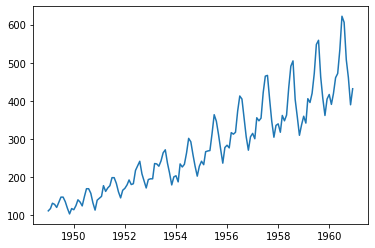

In [7]:
plt.plot(ts)

In [8]:
from IPython.display import display

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time
import seaborn as sns
sns.set(style="whitegrid")

import warnings

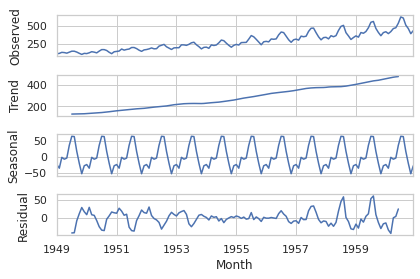

In [9]:
result = seasonal_decompose(ts,model='additive')      #applied seasonal decomposition to get trend and seasons.
fig = result.plot()

#Getting dependent terms of model

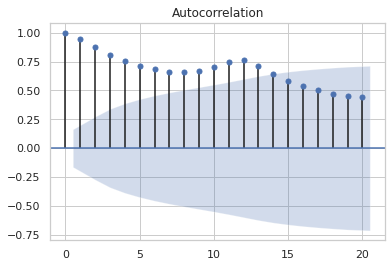

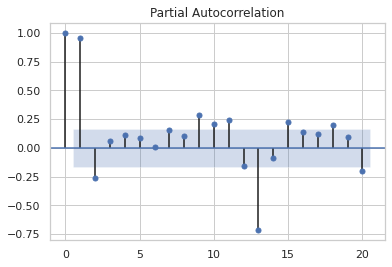

In [10]:
plot_acf(ts, lags=20);
plot_pacf(ts, lags=20);  #getting order of Auto regression (p) and getting number of forecast errors(q) to specify for the model.
                         #p is point where acf increased significantly, it can be any points but in our graph we get increasing trend at 0.


#ARIMA MODEL

In [11]:
arima = ARIMA(ts, order=(2,1,0))
arima_predictions = arima.fit().predict()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


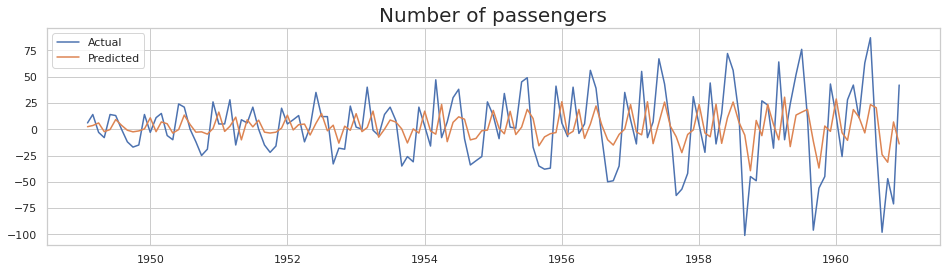

In [12]:
plt.figure(figsize=(16,4))
plt.plot(ts.diff(), label="Actual")
plt.plot(arima_predictions, label="Predicted")
plt.title('Number of passengers', fontsize=20)
#plt.ylabel('TIme', fontsize=16)
plt.legend()

#SARIMA MODEL

In [13]:
sarima = SARIMAX(ts, order=(2,1,0), seasonal_order=(1,1,1,12))
sarima_predictions = sarima.fit().predict()                            #Links to get SARIMAX parameters :- https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/
                                                                       #https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
                                                                       #https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


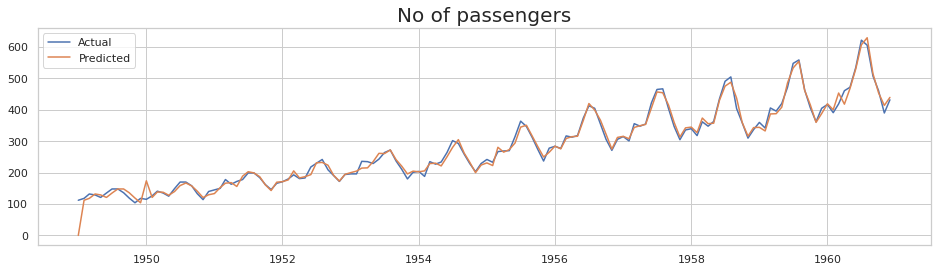

In [14]:
plt.figure(figsize=(16,4))
plt.plot(ts, label="Actual")
plt.plot(sarima_predictions, label="Predicted")
plt.title('No of passengers', fontsize=20)
#plt.ylabel('Sales', fontsize=16)
plt.legend()
                                                                

#RMSE OF ARIMA WITH PREDICTIONS NOT BRINGING TO ORGINAL SCALE

In [15]:
print(ts.diff())
actual_arima=ts.diff()
print(actual_arima)

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: #Passengers, Length: 144, dtype: float64
Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: #Passengers, Length: 144, dtype: float64


In [16]:
#mask = actual.isna().groupby(actual.index.normalize()).transform('any')
#actual[~mask]
actual_arima.drop(actual_arima.index[0:1], axis=0, inplace=True)
print(actual_arima)
                                          #removing first row to balance lengths of both predicted and actual values in rmse.

Month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: #Passengers, Length: 143, dtype: float64


In [17]:
print(arima_predictions)

1949-02-01     2.407537
1949-03-01     3.513672
1949-04-01     5.971564
1949-05-01    -2.325767
1949-06-01    -0.287128
                ...    
1960-08-01    20.458622
1960-09-01   -24.149990
1960-10-01   -31.403332
1960-11-01     6.912141
1960-12-01   -13.991240
Freq: MS, Length: 143, dtype: float64


In [18]:
print('RMSE: %.4f'%np.sqrt(sum((actual_arima-arima_predictions)**2)/(len(actual_arima))))

RMSE: 31.1997


#RMSE OF SARIMA WITH PREDICTIONS NOT BRINGING TO ORIGINAL SCALE

In [19]:
print(ts)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64


In [20]:
ts.drop(ts.index[0:1], axis=0, inplace=True)
print(ts)

Month
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 143, dtype: int64


In [21]:
print(sarima_predictions)

1949-01-01      0.000000
1949-02-01    111.997211
1949-03-01    118.000376
1949-04-01    131.999232
1949-05-01    129.000331
                 ...    
1960-08-01    629.730119
1960-09-01    515.355117
1960-10-01    454.518168
1960-11-01    414.129275
1960-12-01    439.663043
Freq: MS, Length: 144, dtype: float64


In [22]:
sarima_predictions.drop(sarima_predictions.index[0:1], axis=0, inplace=True)
print(sarima_predictions)        #removing first row to balance lengths of both predicted and actual values in rmse.

1949-02-01    111.997211
1949-03-01    118.000376
1949-04-01    131.999232
1949-05-01    129.000331
1949-06-01    121.000324
                 ...    
1960-08-01    629.730119
1960-09-01    515.355117
1960-10-01    454.518168
1960-11-01    414.129275
1960-12-01    439.663043
Freq: MS, Length: 143, dtype: float64


In [23]:
print('RMSE: %.4f'%np.sqrt(sum((ts-sarima_predictions)**2)/(len(ts))))

RMSE: 12.4941


#MOVING AVERAGE MODEL


In [24]:
ma = ARIMA(ts, order=(0,1,2))
ma_predictions = ma.fit().predict()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


#RMSE OF MA MODEL NOT BRINGING TO ORIGINAL SCALE.

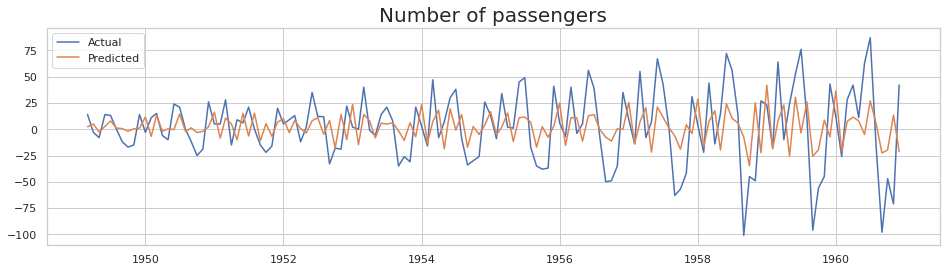

In [25]:
plt.figure(figsize=(16,4))
plt.plot(ts.diff(), label="Actual")
plt.plot(ma_predictions, label="Predicted")
plt.title('Number of passengers', fontsize=20)
#plt.ylabel('TIme', fontsize=16)
plt.legend()

In [26]:
print(ma_predictions)

1949-03-01     2.419195
1949-04-01     4.958844
1949-05-01    -2.533009
1949-06-01     2.568513
1949-07-01     7.859084
                ...    
1960-08-01     5.513541
1960-09-01   -22.632745
1960-10-01   -19.623122
1960-11-01    13.570691
1960-12-01   -21.396999
Freq: MS, Length: 142, dtype: float64


In [27]:
print(ts.diff())
ma_actual=ts.diff();

Month
1949-02-01     NaN
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: #Passengers, Length: 143, dtype: float64


In [28]:
ma_actual.drop(ma_actual.index[0:1], axis=0, inplace=True)
print(ma_actual)

Month
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
1949-07-01    13.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: #Passengers, Length: 142, dtype: float64


In [29]:
print('RMSE: %.4f'%np.sqrt(sum((ma_actual-ma_predictions)**2)/(len(ma_actual))))

RMSE: 31.3277


#Conclusion

In [30]:
print("AS Lower RMSE value indicates better fitting model, here SARIMA is better than ARIMA and MA")

AS Lower RMSE value indicates better fitting model, here SARIMA is better than ARIMA and MA


NOTE:- RMSE OF ARIMA OF SAME DATASET APPEARS TO BE DIFFERENT FROM THAT OF ARTICLE2 AS THE WAY OF CALCULATING IS DIFFERENT, HERE IT IS CHECKED WITH ts.diff() and predictions but there the prediction results are scaled back to orginal and checked.


#EXPLORING LSTM MODEL IN 5 WAYS OF REGRESSION

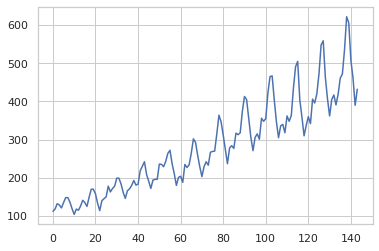

In [31]:

import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('/content/AirPassengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

a)LSTM FOR REGRESSION

In [32]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [33]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [34]:
dataframe = pandas.read_csv('/content/AirPassengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [35]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)      #As LSTM is Sensitive with scale of data ,normalizing use min max scaler between ranges 0,1.

In [36]:
train_size = int(len(dataset) * 0.67)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [37]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):   #The function takes two arguments: the dataset, which is a NumPy array that we want to convert into a dataset, 
  #and the look_back, which is the number of previous time steps to use as input variables to predict the next time period — in this case defaulted to 1.
#This default will create a dataset where X is the number of passengers at a given time (t) and Y is the number of passengers at the next time (t + 1).
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [38]:
look_back = 1
trainX, trainY = create_dataset(train, look_back) #converting as above mentioned function for training and testing.
testX, testY = create_dataset(test, look_back)

In [39]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))         #Currently, our data is in the form: [samples, features] and we are framing the problem as one time step for each sample. 

In [40]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) #4 are the hidden LSTM blocks and 1 input layer as visible.
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;

Epoch 1/100
94/94 - 4s - loss: 0.0516 - 4s/epoch - 41ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0289 - 255ms/epoch - 3ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0206 - 341ms/epoch - 4ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0179 - 246ms/epoch - 3ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0166 - 227ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0158 - 150ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0145 - 163ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0132 - 158ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0115 - 162ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0098 - 147ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0081 - 161ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0064 - 161ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0050 - 238ms/epoch - 3ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0039 - 280ms/epoch - 3ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0032 - 246ms/epoch - 3ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0026 - 244ms/epoc

In [41]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [42]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [43]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score RMSE: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score RMSE: %.2f RMSE' % (testScore))

Train Score RMSE: 22.69 RMSE
Test Score RMSE: 49.75 RMSE


GENERATION OF PREDICTIONS


In [44]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)         
trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

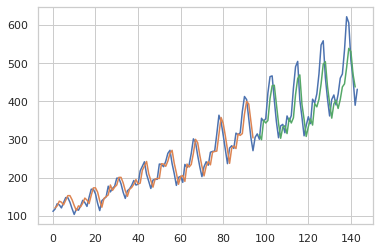

In [45]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
plt.show()

b)LSTM  FOR REGRESSION USING THE WINDOW METHOD 

We can also phrase the problem so that multiple, recent time steps can be used to make the prediction for the next time step.

This is called a window, and the size of the window is a parameter that can be tuned for each problem.

For example, given the current time (t) we want to predict the value at the next time in the sequence (t+1), we can use the current time (t), as well as the two prior times (t-1 and t-2) as input variables.

When phrased as a regression problem, the input variables are t-2, t-1, t and the output variable is t+1.

In [46]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [47]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [48]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('/content/AirPassengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [49]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [50]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [51]:
# reshape into X=t and Y=t+1
look_back = 3 #The main difference is here we use window size of 3 implies t-2,t-1,t values are checked.
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [52]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [53]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
92/92 - 6s - loss: 0.0464 - 6s/epoch - 61ms/step
Epoch 2/100
92/92 - 0s - loss: 0.0201 - 488ms/epoch - 5ms/step
Epoch 3/100
92/92 - 1s - loss: 0.0129 - 518ms/epoch - 6ms/step
Epoch 4/100
92/92 - 0s - loss: 0.0111 - 438ms/epoch - 5ms/step
Epoch 5/100
92/92 - 0s - loss: 0.0101 - 449ms/epoch - 5ms/step
Epoch 6/100
92/92 - 0s - loss: 0.0091 - 434ms/epoch - 5ms/step
Epoch 7/100
92/92 - 0s - loss: 0.0082 - 330ms/epoch - 4ms/step
Epoch 8/100
92/92 - 0s - loss: 0.0074 - 369ms/epoch - 4ms/step
Epoch 9/100
92/92 - 0s - loss: 0.0068 - 393ms/epoch - 4ms/step
Epoch 10/100
92/92 - 0s - loss: 0.0063 - 349ms/epoch - 4ms/step
Epoch 11/100
92/92 - 0s - loss: 0.0058 - 348ms/epoch - 4ms/step
Epoch 12/100
92/92 - 1s - loss: 0.0054 - 515ms/epoch - 6ms/step
Epoch 13/100
92/92 - 0s - loss: 0.0051 - 472ms/epoch - 5ms/step
Epoch 14/100
92/92 - 0s - loss: 0.0049 - 433ms/epoch - 5ms/step
Epoch 15/100
92/92 - 1s - loss: 0.0048 - 555ms/epoch - 6ms/step
Epoch 16/100
92/92 - 0s - loss: 0.0047 - 431ms/epoc

In [54]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [55]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [57]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score RMSE: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score RMSE: %.2f RMSE' % (testScore))

Train Score RMSE: 23.24 RMSE
Test Score RMSE: 48.90 RMSE


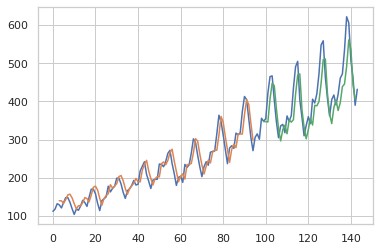

In [58]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)  #red is training data, green is testing data, blue is orginal dataset.
plt.plot(testPredictPlot)
plt.show()

c) LSTM FOR REGRESSION WITH TIMESTEPS

(Here the difference is we reshape back to time steps of previous one.)

Epoch 1/100
92/92 - 2s - loss: 0.0172 - 2s/epoch - 18ms/step
Epoch 2/100
92/92 - 0s - loss: 0.0074 - 175ms/epoch - 2ms/step
Epoch 3/100
92/92 - 0s - loss: 0.0064 - 162ms/epoch - 2ms/step
Epoch 4/100
92/92 - 0s - loss: 0.0057 - 159ms/epoch - 2ms/step
Epoch 5/100
92/92 - 0s - loss: 0.0050 - 158ms/epoch - 2ms/step
Epoch 6/100
92/92 - 0s - loss: 0.0047 - 173ms/epoch - 2ms/step
Epoch 7/100
92/92 - 0s - loss: 0.0044 - 157ms/epoch - 2ms/step
Epoch 8/100
92/92 - 0s - loss: 0.0039 - 179ms/epoch - 2ms/step
Epoch 9/100
92/92 - 0s - loss: 0.0042 - 158ms/epoch - 2ms/step
Epoch 10/100
92/92 - 0s - loss: 0.0040 - 154ms/epoch - 2ms/step
Epoch 11/100
92/92 - 0s - loss: 0.0039 - 146ms/epoch - 2ms/step
Epoch 12/100
92/92 - 0s - loss: 0.0039 - 154ms/epoch - 2ms/step
Epoch 13/100
92/92 - 0s - loss: 0.0037 - 160ms/epoch - 2ms/step
Epoch 14/100
92/92 - 0s - loss: 0.0038 - 159ms/epoch - 2ms/step
Epoch 15/100
92/92 - 0s - loss: 0.0038 - 172ms/epoch - 2ms/step
Epoch 16/100
92/92 - 0s - loss: 0.0039 - 169ms/epoc

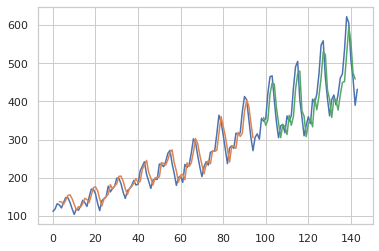

In [59]:
# LSTM for international airline passengers problem with time step regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('/content/AirPassengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))  #MAIN DIFFERENCE IN THIS STEP
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

d)LSTM WITH MEMORY BETWEEN BATCHES 
(Here we will be making LSTM layers as stateful for that we will be resseting states everytime for each epoch).

92/92 - 2s - loss: 0.0040 - 2s/epoch - 18ms/step
92/92 - 0s - loss: 0.0058 - 158ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0051 - 155ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0047 - 157ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0045 - 150ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0044 - 149ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0043 - 152ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0043 - 162ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0042 - 152ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0042 - 164ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0042 - 150ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0041 - 146ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0041 - 157ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0041 - 156ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0040 - 154ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0040 - 150ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0040 - 158ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0040 - 153ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0039 - 157ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0039 - 147ms

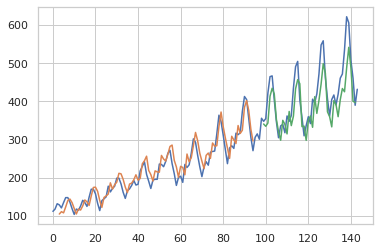

In [60]:
# LSTM for international airline passengers problem with memory
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('/content/AirPassengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):                                                                       #THE MAIN DIFFERENCE IS HERE
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

e) STACKED LSTMs WITH MEMORY BETWEEN BATCHES

(LSTM networks can be stacked in Keras in the same way that other layer types can be stacked. One addition to the configuration that is required is that an LSTM layer prior to each subsequent LSTM layer must return the sequence. This can be done by setting the return_sequences parameter on the layer to True.)

92/92 - 4s - loss: 0.0052 - 4s/epoch - 40ms/step
92/92 - 0s - loss: 0.0136 - 246ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0097 - 273ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0072 - 246ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0060 - 237ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0057 - 230ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0056 - 242ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0056 - 246ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0056 - 223ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0056 - 233ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0056 - 230ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0056 - 220ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0056 - 238ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0056 - 262ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0056 - 242ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0056 - 235ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0055 - 250ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0055 - 234ms/epoch - 3ms/step
92/92 - 0s - loss: 0.0055 - 224ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0055 - 225ms

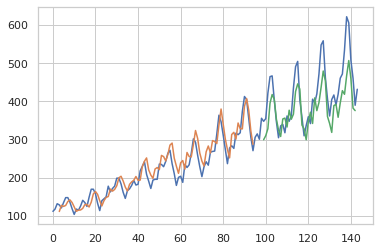

In [61]:
# Stacked LSTM for international airline passengers problem with memory
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('/content/AirPassengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))  #MAIN DIFFERENCE IS HERE.
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)  #red is trained data
plt.plot(testPredictPlot)   #green is tested data.
plt.show()